In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import os

In [3]:
# Creating Path for "weekly new covid cases"
weekly_covid_cases = "weekly new covid cases.csv"
weekly_covid_cases_df = pd.read_csv(weekly_covid_cases)
weekly_covid_cases_df

,Week ending,New covid cases
0,1/15/2020,0
1,1/22/2020,6
2,1/29/2020,5
3,2/5/2020,12
4,2/12/2020,13
...,...,...
169,4/12/2023,109860
170,4/19/2023,106901
171,4/26/2023,96350
172,5/3/2023,85668


<IPython.core.display.Javascript object>


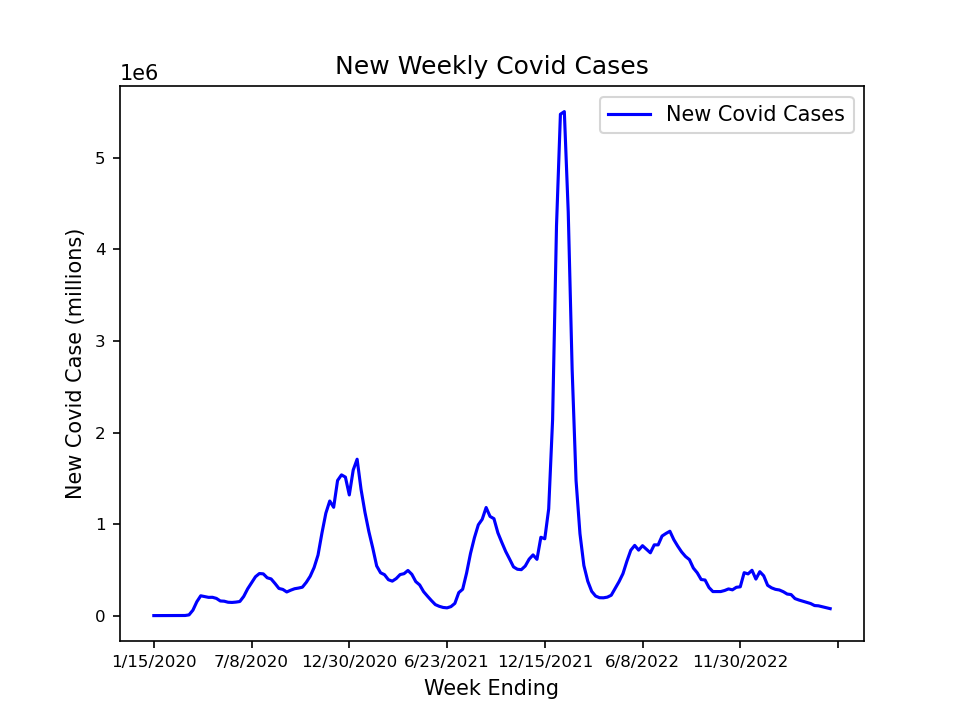

<Axes: title={'center': 'New Weekly Covid Cases'}, xlabel='Week Ending', ylabel='New Covid Case (millions)'>

In [4]:
# Create a line graph for weekly new covid cases
(
    weekly_covid_cases_df
    .plot(kind="line", x="Week ending", y="New covid cases", ylabel="New Covid Case (millions)", xlabel="Week Ending", color="blue", fontsize=8, title="New Weekly Covid Cases", label="New Covid Cases")
)

In [5]:
# Creating Path for "theater_sales"
theater_sales = "theater_sales.csv"
theater_sales_df = pd.read_csv(theater_sales)
theater_sales_df

,Year,Tickets Sold,Total Box Office,Total Inflation Adjusted Box Office,Average Ticket Price
0,2023,922137633,\t$9710109274,\t$9710109274,\t$10.53
1,2022,709677708,\t$7425608770,\t$7425608842,\t$10.53
2,2021,434086383,\t$4514298818,\t$4542443837,\t$10.40
3,2020,211336307,\t$1988111579,\t$2205648319,\t$9.41
4,2019,1227673842,\t$11245494999,\t$12829297880,\t$9.16
5,2018,1310784383,\t$11941248262,\t$13694331154,\t$9.11
6,2017,1225554386,\t$10993225666,\t$12805062478,\t$8.97
7,2016,1302214022,\t$11264154534,\t$13607217444,\t$8.65
8,2015,1323104760,\t$11153776110,\t$13826302848,\t$8.43
9,2014,1257256418,\t$10271788081,\t$13134887011,\t$8.17


In [6]:
# Clean data for "theater_sales"
theater_sales_df = theater_sales_df.assign(
        total_box_office = lambda x:x['Total Box Office'].str.replace('[^0-9.]','',regex=True),
        adjusted_box_office = lambda x:x['Total Inflation Adjusted Box Office'].str.replace('[^0-9.]','',regex=True),
        tickets_sold = lambda x:x['Tickets Sold'],
        average_ticket_price = lambda x:x['Average Ticket Price'].str.replace('[^0-9.]','',regex=True))
theater_sales_df = theater_sales_df.rename({'Year':"year"}, axis=1)
theater_sales_df = theater_sales_df.drop(['Total Box Office','Total Inflation Adjusted Box Office', 'Average Ticket Price', 'Tickets Sold'], axis=1)
theater_sales_df = theater_sales_df.astype({'total_box_office':float,
                                            'adjusted_box_office':float,
                                            'average_ticket_price':float,
                                            'tickets_sold':int,
                                            'year':int})
theater_sales_df

,year,total_box_office,adjusted_box_office,tickets_sold,average_ticket_price
0,2023,9.710109e+09,9.710109e+09,922137633,10.53
1,2022,7.425609e+09,7.425609e+09,709677708,10.53
2,2021,4.514299e+09,4.542444e+09,434086383,10.40
3,2020,1.988112e+09,2.205648e+09,211336307,9.41
4,2019,1.124549e+10,1.282930e+10,1227673842,9.16
5,2018,1.194125e+10,1.369433e+10,1310784383,9.11
6,2017,1.099323e+10,1.280506e+10,1225554386,8.97
7,2016,1.126415e+10,1.360722e+10,1302214022,8.65
8,2015,1.115378e+10,1.382630e+10,1323104760,8.43
9,2014,1.027179e+10,1.313489e+10,1257256418,8.17


<IPython.core.display.Javascript object>


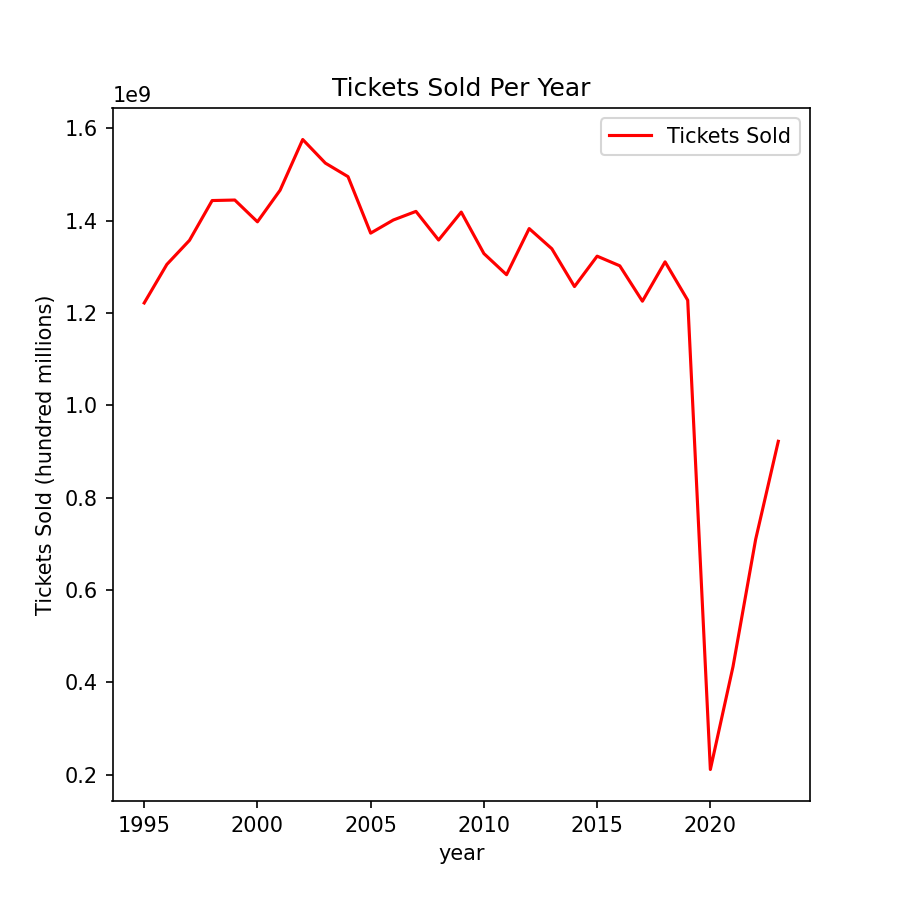

<Axes: title={'center': 'Tickets Sold Per Year'}, xlabel='year', ylabel='Tickets Sold (hundred millions)'>

In [7]:
# Create line graph for "theater_sales" Tickets Sold
(
    theater_sales_df.plot(kind='line', x='year', y='tickets_sold', ylabel='Tickets Sold (billions)', title="Tickets Sold Per Year", label="Tickets Sold", figsize=(6,6), color="red")
)

In [8]:
# Dataset of theater sales during covid times
covid_theater_sales_df = theater_sales_df.loc[theater_sales_df["year"] > 2019]
covid_theater_sales_df

,year,total_box_office,adjusted_box_office,tickets_sold,average_ticket_price
0,2023,9.710109e+09,9.710109e+09,922137633,10.53
1,2022,7.425609e+09,7.425609e+09,709677708,10.53
2,2021,4.514299e+09,4.542444e+09,434086383,10.40
3,2020,1.988112e+09,2.205648e+09,211336307,9.41


<IPython.core.display.Javascript object>


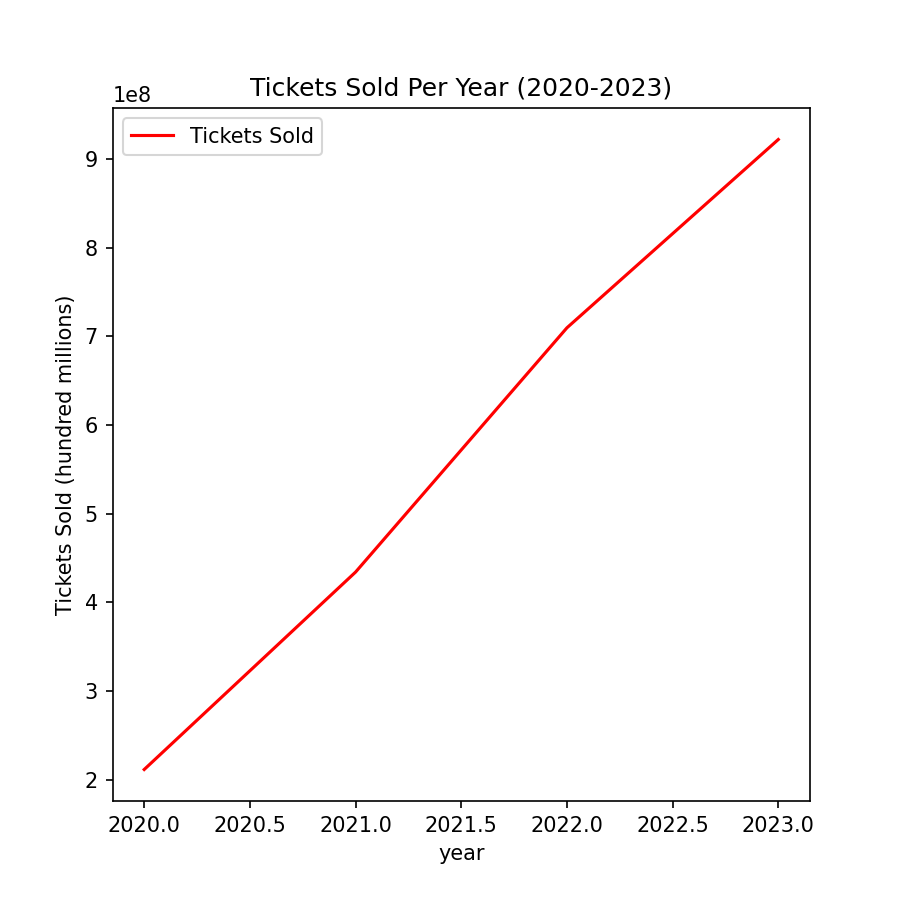

In [18]:
# create line graph for theater sales during covid years
(
    covid_theater_sales_df.plot(kind='line', x='year', y='tickets_sold', ylabel='Tickets Sold (hundred millions)', title="Tickets Sold Per Year (2020-2023)", figsize=(6,6), color="red", label="Tickets Sold")
)
plt.savefig("Tickets Sold Per Year (2020-2023)")

<IPython.core.display.Javascript object>


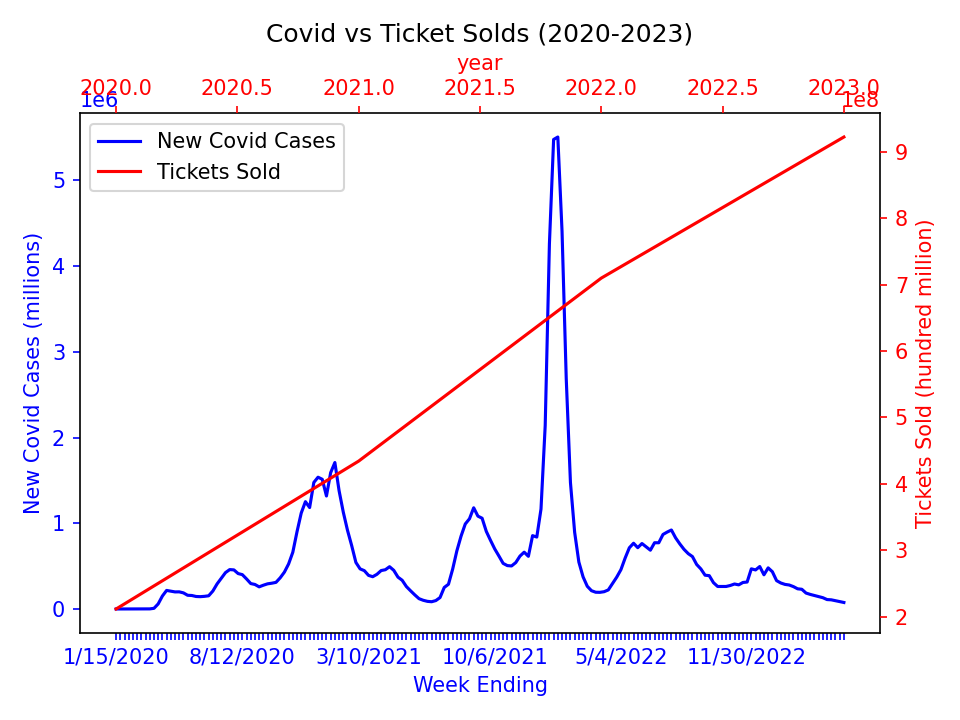

In [20]:
# create line graph with both the ticket sales during covid and weekly new covid cases
fig=plt.figure()
ax1=fig.add_subplot(111, label="1")
ax2=fig.add_subplot(111, label="2", frame_on=False)

# weekly new covid cases line graph
ax1.plot(weekly_covid_cases_df["Week ending"], weekly_covid_cases_df["New covid cases"], color="blue", label="New Covid Cases")
ax1.set_xlabel("Week Ending", color="blue")
ax1.set_ylabel("New Covid Cases (millions)", color="blue")
ax1.tick_params(axis='x', colors="blue")
freq = ax1.xaxis.get_ticklabels()
freq = list(set(freq) - set(freq[::30]))
for label in freq:
    label.set_visible(False)
ax1.tick_params(axis='y', colors="blue")

# Tickets sold during covid line graph
ax2.plot(covid_theater_sales_df["year"], covid_theater_sales_df["tickets_sold"], color="red", label="Tickets Sold")
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel("year", color="red") 
ax2.set_ylabel("Tickets Sold (hundred million)", color="red")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="red")
ax2.tick_params(axis='y', colors="red")

# legend 
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
combined_labels = labels + labels2
combined_handles = lines + lines2
ax1.legend(combined_handles, combined_labels, loc='upper left')

plt.title("Covid vs Ticket Solds (2020-2023)")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
plt.savefig("Covid vs Ticket Solds (2020-2023)")

In [11]:
# create a path for streaming annual subscribers
df_streaming_sub = (
    pd.read_csv("streaming annual subscribers.csv")
    .melt(id_vars='Subscribers(mm)', var_name='year',value_name='subscribers')
    .rename(
        {
            'Subscribers(mm)':'company'
        },
        axis=1
    )
    .astype(
        {
            'year':int
        }
    )
)

df_streaming_sub

,company,year,subscribers
0,Netflix,2018,124.35
1,Hulu,2018,20.10
2,HBO Max,2018,0.00
3,Disney Plus,2018,0.00
4,Netflix,2019,151.56
5,Hulu,2019,23.20
6,HBO Max,2019,0.00
7,Disney Plus,2019,0.00
8,Netflix,2020,192.95
9,Hulu,2020,28.80


In [12]:
# create a path for streaming annual revenue
df_streaming_rev = (
    pd.read_csv("streaming annual revenue.csv")
    .melt(id_vars='Revenue ($bn)', var_name='year',value_name='revenue')
    .rename(
        {
            'Revenue ($bn)':'company'
        },
        axis=1
    )
    .astype(
        {
            'year':int
        }
    )
)

df_streaming_rev.head()

,company,year,revenue
0,Netflix,2018,15.7
1,Hulu,2018,0.0
2,HBO Max,2018,0.0
3,Disney Plus,2018,0.0
4,Netflix,2019,20.1


In [13]:
# calculate streaming revenue
(
    df_streaming_rev
    .groupby('year')
    .agg(
        total_streaming_revenue = ('revenue',sum)
    )
    .merge(
        theater_sales_df
        .loc[:,['year','adjusted_box_office']],
        on='year',
        how='inner'
    )
        .rename(
        {
            'total_streaming_revenue':'streaming',
            'adjusted_box_office':'theater',
        },
        axis=1
    )
        .assign(
        total = lambda x:x['streaming']*1e9 + x['theater'],
        streaming_pct = lambda x:x['streaming']*1e9/x['total']
    )
)

,year,streaming,theater,total,streaming_pct
0,2018,15.70,1.369433e+10,2.939433e+10,0.534117
1,2019,23.80,1.282930e+10,3.662930e+10,0.649753
2,2020,43.82,2.205648e+09,4.602565e+10,0.952078
3,2021,51.75,4.542444e+09,5.629244e+10,0.919306
4,2022,55.84,7.425609e+09,6.326561e+10,0.882628


<IPython.core.display.Javascript object>


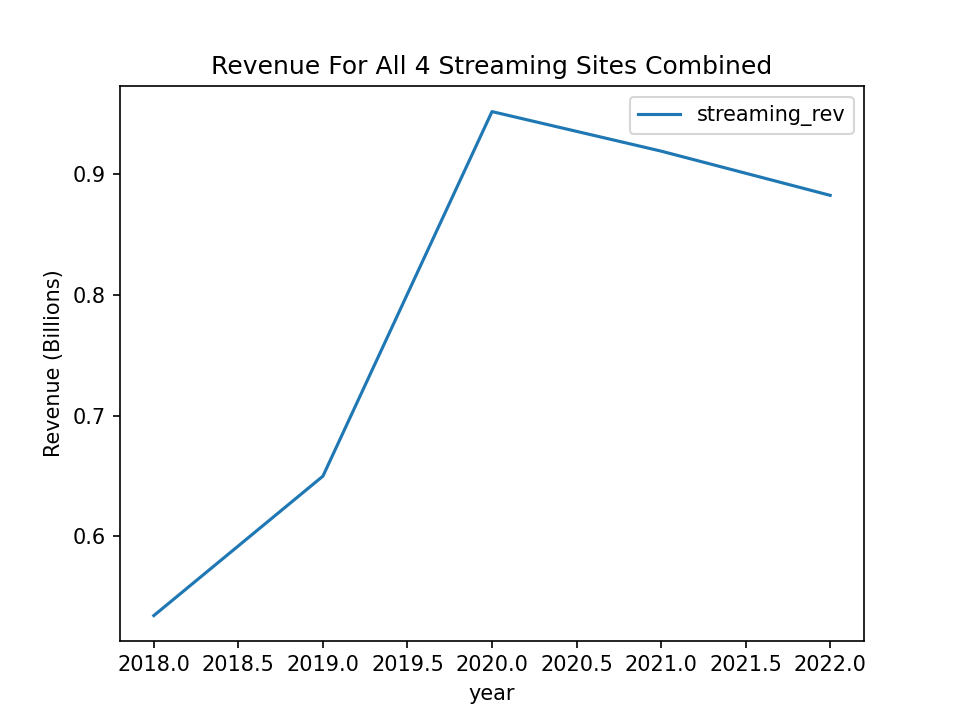

<Axes: title={'center': 'Revenue For All 4 Streaming Sites Combined'}, xlabel='year', ylabel='Revenue (Billions)'>

In [14]:
# streaming total revenue line graph
(
        df_streaming_rev
    .groupby('year')
    .agg(
        total_streaming_revenue = ('revenue',sum)
    )
    .merge(
        theater_sales_df
        .loc[:,['year','adjusted_box_office']],
        on='year',
        how='inner'
    )
        .rename(
        {
            'total_streaming_revenue':'streaming',
            'adjusted_box_office':'theater',
        },
        axis=1
    )
        .assign(
        total = lambda x:x['streaming']*1e9 + x['theater'],
        streaming_rev = lambda x:x['streaming']*1e9/x['total']
    )
    .plot(
        kind='line',
        x='year',
        y='streaming_rev',
        title='Revenue For All 4 Streaming Sites Combined',
        ylabel='Revenue (Billions)'
    )
)

<IPython.core.display.Javascript object>


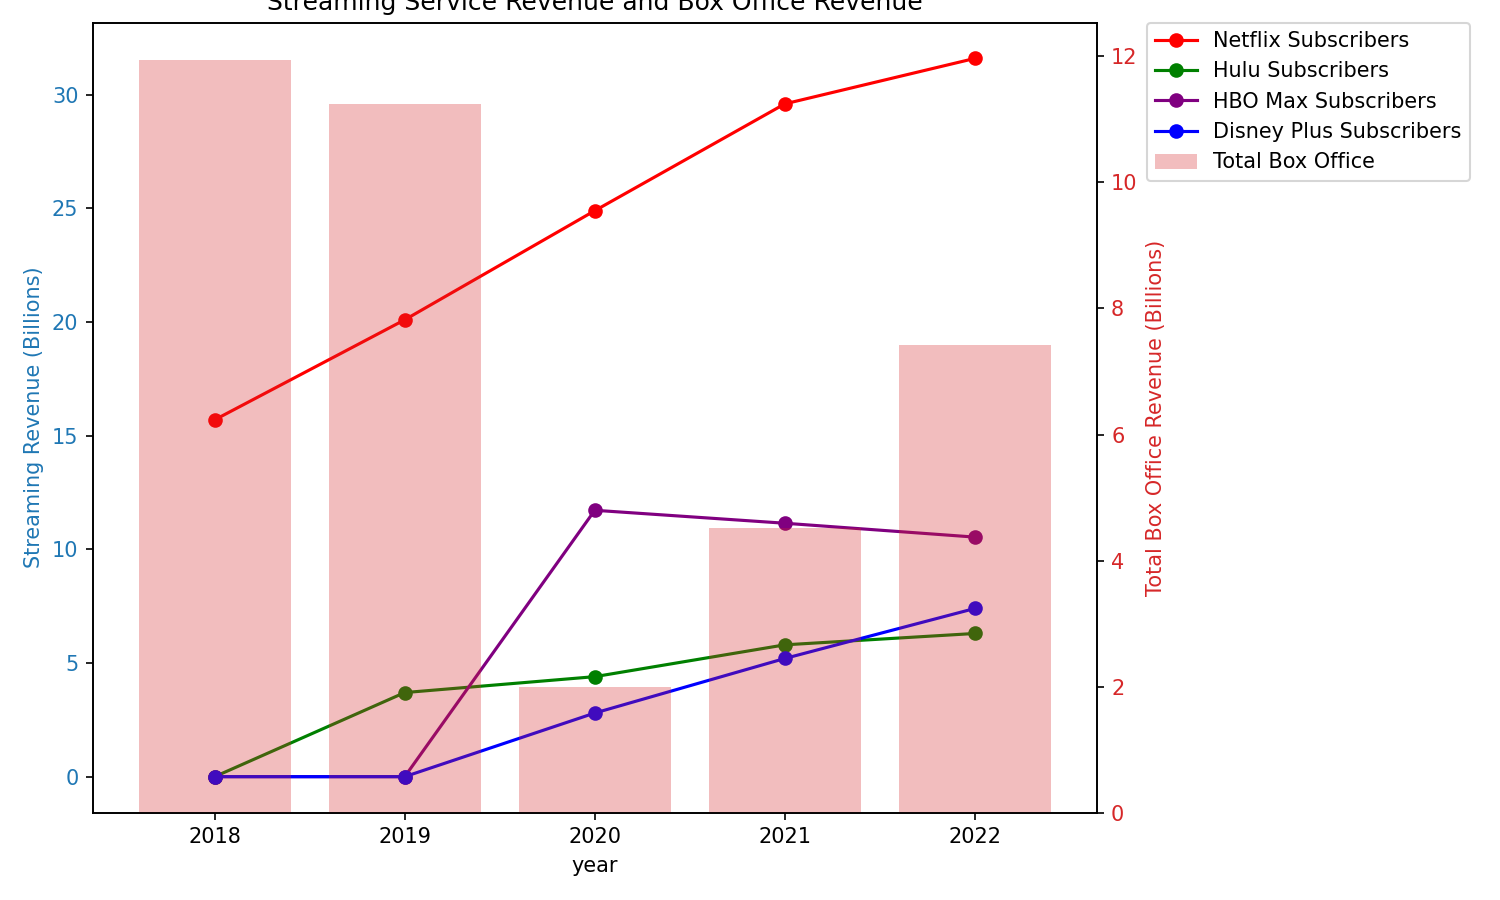

FileNotFoundError: [Errno 2] No such file or directory: 'Figures/Streaming Service Revenue and Box Office Revenue.png'

In [15]:
# Create dataframes from the provided data
streaming_revenue_data = pd.DataFrame({
    'year': [2018, 2019, 2020, 2021, 2022],
    'Netflix': [15.7, 20.1, 24.9, 29.6, 31.6],
    'Hulu': [0, 3.7, 4.4, 5.8, 6.3],
    'HBO Max': [0, 0, 11.72, 11.15, 10.54],
    'Disney Plus': [0, 0, 2.8, 5.2, 7.4]
})

#box_office_data = pd.DataFrame({
#    'Year': [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
#             2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
#    'Total Box Office': [9710109274, 7425608770, 4514298818, 1988111579, 11245494999, 11941248262,
#                         10993225666, 11264154534, 11153776110, 10271788081, 10887356155, 11007242918,
#                         10173568793, 10483766514, 10639257284, 9750794626, 9770087282, 9179124447,
#                         8800805718, 9285881957, 9193277289, 9155147215, 8296854718, 7532311479,
#                         7338894852, 6770273245, 6230405144, 5769092462, 5314550785]
#})

# Divide box office by 1 billion
theater_sales_df['total_box_office'] /= 1000000000

# Merge the dataframes based on 'Year'
merged_data = streaming_revenue_data.merge(theater_sales_df, on='year')

# Create a line graph and a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('year')
ax1.set_ylabel('Streaming Revenue (Billions)', color=color)
ax1.plot(merged_data['year'], merged_data['Netflix'], marker='o', label='Netflix Subscribers', color='red')
ax1.plot(merged_data['year'], merged_data['Hulu'], marker='o', label='Hulu Subscribers', color='green')
ax1.plot(merged_data['year'], merged_data['HBO Max'], marker='o', label='HBO Max Subscribers', color='purple')
ax1.plot(merged_data['year'], merged_data['Disney Plus'], marker='o', label='Disney Plus Subscribers', color='blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Total Box Office Revenue (Billions)', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_data['year'], merged_data['total_box_office'], color=color, alpha=0.3, label='Total Box Office')
ax2.tick_params(axis='y', labelcolor=color)

# Combine the legends from both axes and place it outside the chart with a more compact size
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
combined_labels = labels + bar_labels
combined_handles = lines + bars
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Streaming Service Revenue and Box Office Revenue')
plt.show()
plt.savefig("Figures/Streaming Service Revenue and Box Office Revenue")

In [ ]:
# Create dataframes from the provided data (values are divided by 1 million)
subscribers_data = pd.DataFrame({
    'year': [2018, 2019, 2020, 2021, 2022],
    'Netflix': [124.35, 151.56, 192.95, 209, 220.6],
    'Hulu': [20.1, 23.2, 28.8, 37.8, 41.4],
    'HBO Max': [0, 0, 36.3, 47, 51.3],
    'Disney Plus': [0, 0, 33.5, 103.6, 137.7]
})

#ticket_sales_data = pd.DataFrame({
#    'Year': [2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010,
#             2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995],
#    'Tickets Sold': [922137633, 709677708, 434086383, 211336307, 1227673842, 1310784383, 1225554386,
#                     1302214022, 1323104760, 1257256418, 1339157833, 1382819090, 1282921357, 1328740720,
#                     1418567388, 1358049103, 1420070454, 1401392669, 1372980280, 1495310788, 1524589620,
#                     1575756527, 1465875103, 1397460079, 1444664086, 1443554850, 1357386547, 1305224361,
#                     1221735652]
#})

# Divide ticket sales by 1 billion
theater_sales_df['tickets_sold'] /= 1000000000

# Merge the dataframes based on 'Year'
merged2_data = subscribers_data.merge(theater_sales_df, on='year')

# Create a line graph and a bar graph
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('year')
ax1.set_ylabel('Subscribers (Millions)', color=color)
ax1.plot(merged2_data['year'], merged2_data['Netflix'], marker='o', label='Netflix Subscribers', color='red')
ax1.plot(merged2_data['year'], merged2_data['Hulu'], marker='o', label='Hulu Subscribers', color='green')
ax1.plot(merged2_data['year'], merged2_data['HBO Max'], marker='o', label='HBO Max Subscribers', color='purple')
ax1.plot(merged2_data['year'], merged2_data['Disney Plus'], marker='o', label='Disney Plus Subscribers', color='blue')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Tickets Sold (Billions)', color=color)  # we already handled the x-label with ax1
ax2.bar(merged_data['year'], merged_data['tickets_sold'], color=color, alpha=0.3, label='Tickets Sold')
ax2.tick_params(axis='y', labelcolor=color)

# Combine the legends from both axes and place it outside the chart with a more compact size
lines, labels = ax1.get_legend_handles_labels()
bars, bar_labels = ax2.get_legend_handles_labels()
combined_labels = labels + bar_labels
combined_handles = lines + bars
ax1.legend(combined_handles, combined_labels, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Streaming Service Subscribers and Theater Ticket Sold')
plt.show()